In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Raw upper secondary.csv")

# Drop unnecessary columns
columns_to_drop = ['Target', 'Indicator Number', 'Metadata']
df = df.drop(columns=columns_to_drop, axis='columns')

# Pivot the Indicator name column into multiple columns
df_pivoted = df.pivot_table(index=["Region", "Country", "Year"], columns="Indicator Name", values="Value").reset_index()

# Extract gender information and remove it from the column names
df_pivoted.columns = df_pivoted.columns.str.replace(r'\s+\(%\w+\)$', '')
df_pivoted.columns.name = None

# Melt the pivoted DataFrame to reshape it
df_melted = df_pivoted.melt(id_vars=["Region", "Country", "Year"], var_name="Indicator Name", value_name="Value")

# Split the "Indicator Name" column into "Indicator" and "Gender"
df_melted[['Indicator', 'Gender']] = df_melted['Indicator Name'].str.extract(r'(.*)\s+(male|female)')

# Drop the "Indicator Name" column
df_melted = df_melted.drop(columns=["Indicator Name"])

# Pivot the melted DataFrame to create separate columns for each indicator and gender
df_final = df_melted.pivot_table(index=["Region", "Country", "Year", "Gender"], columns="Indicator", values="Value").reset_index()

# Reorder the columns as needed
column_order = ['Region', 'Country', 'Year', 'Gender'] + list(df_final.columns[4:])
df_final = df_final[column_order]

# Display the final DataFrame
#print(df_final)

df_final.to_csv("KubeFlow upper secondary.csv")

In [2]:
df_final.columns

Index(['Region', 'Country', 'Year', 'Gender',
       'Completion rate, upper secondary education,',
       'Gross enrolment ratio, early childhood education,',
       'Gross enrolment ratio, early childhood educational development programmes,',
       'Literacy rate, population 25-64 years,',
       'Percentage of children under 5 years experiencing positive and stimulating home learning environments,',
       'Proportion of teachers with the minimum required qualifications in upper secondary education,',
       'Teacher attrition rate from upper secondary education,'],
      dtype='object', name='Indicator')

In [3]:
df_final.shape

(4350, 11)

In [4]:
df_Addcol = pd.read_csv("upper secondary metadata.csv")

columns_to_drop = ['Target', 'Indicator Number', 'Metadata']
df_Addcol = df_Addcol.drop(columns=columns_to_drop, axis='columns')

# Pivot the Indicator name column into multiple columns
df_Addcol = df_Addcol.pivot_table(index=["Region", "Country", "Year"], columns="Indicator Name", values="Value")

df_Addcol.to_csv("try2.csv")

In [5]:
# Import pandas library
import pandas as pd

# Read the first dataset as a dataframe
df1 = pd.read_csv("KubeFlow upper secondary.csv")

# Read the second dataset as a dataframe
df2 = pd.read_csv("try2.csv")

# Select the columns from the second dataset that you want to add to the first one
cols = ["Existence of funding mechanisms to reallocate education resources to disadvantaged populations", "Expenditure on education as a percentage of total government expenditure (%)", "Government expenditure on education as a percentage of GDP (%)"]

# Merge the two dataframes on country and year, keeping only the selected columns from the second one
df_merged = pd.merge(df1, df2[["Country", "Year"] + cols], on=["Country", "Year"], how="left")

# Drop any duplicate rows from the merged dataframe
df_merged = df_merged.drop_duplicates()



In [6]:
df_merged.shape

(4350, 15)

# Removing duplicate regions
As you can see below the region - Central Asia & Southern Asia are created separately but we a region Central and Southern Asia which has countries present in both/ so we will drop the separately created regions

In [7]:

country_counts = df_merged["Country"].value_counts()

country = "India"

print("{} appears {} times in the first dataset.".format(country, country_counts[country]))

India appears 44 times in the first dataset.


In [8]:

regions = df_merged["Region"].unique()

print("The unique regions in the dataset are:")
print(regions)

The unique regions in the dataset are:
['SDG: Central Asia' 'SDG: Central and Southern Asia'
 'SDG: Eastern and South-Eastern Asia' 'SDG: Europe and Northern America'
 'SDG: Latin America and the Caribbean'
 'SDG: Northern Africa and Western Asia' 'SDG: Oceania'
 'SDG: Southern Asia' 'SDG: Sub-Saharan Africa']


In [9]:
# Grouping the dataframe by Region and get the unique countries in each group
country_groups = df_merged.groupby("Region")["Country"].unique()

print("The unique countries in each region are:")
print(country_groups)

The unique countries in each region are:
Region
SDG: Central Asia                        [Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenis...
SDG: Central and Southern Asia           [Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenis...
SDG: Eastern and South-Eastern Asia      [Brunei Darussalam, Cambodia, China, China, Ho...
SDG: Europe and Northern America         [Albania, Andorra, Austria, Belarus, Belgium, ...
SDG: Latin America and the Caribbean     [Anguilla, Antigua and Barbuda, Argentina, Aru...
SDG: Northern Africa and Western Asia    [Algeria, Armenia, Azerbaijan, Bahrain, Cyprus...
SDG: Oceania                             [Australia, Cook Islands, Fiji, Kiribati, Mars...
SDG: Southern Asia                       [Afghanistan, Bangladesh, Bhutan, India, Iran ...
SDG: Sub-Saharan Africa                  [Angola, Benin, Botswana, Burkina Faso, Burund...
Name: Country, dtype: object


In [10]:

country_counts = df_merged["Country"].value_counts()

country = "India"

print("{} appears {} times in the first dataset.".format(country, country_counts[country]))

India appears 44 times in the first dataset.


In [11]:
df_merged.shape

(4350, 15)

# Keeping only the devloping countries in the dataset 

In [12]:
devloping_countries = ['Afghanistan',
'Albania',
'Algeria',
'American Samoa',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Azerbaijan',
'Bangladesh',
'Belarus',
'Belize',
'Benin',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'Bulgaria',
'Burkina Faso',
'Burundi',
'Cambodia',
'Cameroon',
'Cape Verde',
'Central African Republic',
'Chad',
'Chile',
'China',
'Colombia',
'Comoros',
'Congo, Dem. Rep',
'Congo, Rep.',
'Costa Rica',
'Côte d’Ivoire',
'Cuba',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt, Arab Rep.',
'El Salvador',
'Eritrea',
'Ethiopia',
'Fiji',
'Gabon',
'Gambia',
'Georgia',
'Ghana',
'Grenada',
'Guatemala',
'Guinea',
'Guinea-Bisau',
'Guyana',
'Haiti',
'Honduras',
'India',
'Indonesia',
'Iran, Islamic Rep.',
'Iraq',
'Jamaica',
'Jordan',
'Kazakhstan',
'Kenya',
'Kiribati',
'Korea, Dem Rep.',
'Kosovo',
'Kyrgyz Republic',
'Lao PDR',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Lithuania',
'Macedonia, FYR',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Marshall Islands',
'Mauritania',
'Mauritius',
'Mayotte',
'Mexico',
'Micronesia, Fed. Sts.',
'Moldova',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Myanmar',
'Namibia',
'Nepal',
'Nicaragua',
'Niger',
'Nigeria',
'Pakistan',
'Palau',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Romania',
'Russian Federation',
'Rwanda',
'Samoa',
'São Tomé and Principe',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Solomon Islands',
'Somalia',
'South Africa',
'Sri Lanka',
'St. Kitts and Nevis',
'St. Lucia',
'St. Vincent and the Grenadines',
'Sudan',
'Suriname',
'Swaziland',
'Syrian Arab Republic',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Tonga',
'Tunisia',
'Turkey',
'Turkmenistan',
'Tuvalu',
'Uganda',
'Ukraine',
'Uruguay',
'Uzbekistan',
'Vanuatu',
'Venezuela',
'Vietnam',
'West Bank and Gaza',
'Yemen, Rep.',
'Zambia',
'Zimbabwe']


In [13]:
len(devloping_countries)

145

In [14]:
filtered_df = df_merged[df_merged['Country'].isin(devloping_countries)]

In [15]:
filtered_df.shape

(2592, 15)

In [16]:
# Saving the dataframe as a new CSV file
filtered_df.to_csv("upper secondary final.csv", index=False)

# Data Cleaning

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("upper secondary final.csv")

In [19]:
df.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, upper secondary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Literacy rate, population 25-64 years,","Percentage of children under 5 years experiencing positive and stimulating home learning environments,","Proportion of teachers with the minimum required qualifications in upper secondary education,","Teacher attrition rate from upper secondary education,",Existence of funding mechanisms to reallocate education resources to disadvantaged populations,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,0,SDG: Central Asia,Kazakhstan,2012,female,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.25,3.90
1,1,SDG: Central Asia,Kazakhstan,2012,male,96.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.25,3.90
2,2,SDG: Central Asia,Kazakhstan,2013,female,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.96,3.44
3,3,SDG: Central Asia,Kazakhstan,2013,male,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.96,3.44
4,4,SDG: Central Asia,Kazakhstan,2014,female,97.2,36.65,0.0,NaN,NaN,NaN,NaN,NaN,17.32,3.42


In [20]:
df.isnull().sum()

Unnamed: 0                                                                                                   0
Region                                                                                                       0
Country                                                                                                      0
Year                                                                                                         0
Gender                                                                                                       0
Completion rate, upper secondary education,                                                                716
Gross enrolment ratio, early childhood education,                                                          974
Gross enrolment ratio, early childhood educational development programmes,                                 370
Literacy rate, population 25-64 years,                                                                    1922
P

In [21]:
df2 = df[~df.Year.isin([2022])]
#Excluding the year '2022' from the dataset

**Percentage of Missing Data**

In [22]:
round((df2.isnull().sum()/len(df2) *100), 2)

Unnamed: 0                                                                                                 0.00
Region                                                                                                     0.00
Country                                                                                                    0.00
Year                                                                                                       0.00
Gender                                                                                                     0.00
Completion rate, upper secondary education,                                                               23.99
Gross enrolment ratio, early childhood education,                                                         35.33
Gross enrolment ratio, early childhood educational development programmes,                                14.99
Literacy rate, population 25-64 years,                                                                  

It's observed that about 17% of the dataset didnt have value for the target variable(Completion rate, upper secondary education,).Let's see the names of those countries that didn't have velues for the target variable

In [23]:
null_mask= df['Completion rate, upper secondary education,'].isnull()
null_rows= df.loc[null_mask]
null_countries= null_rows.Country
print("About",null_countries.nunique(), "countries didnt have the target variable")
print("The name of those countries are :", null_countries.unique())

About 93 countries didnt have the target variable
The name of those countries are : ['Tajikistan' 'Uzbekistan' 'Afghanistan' 'Bangladesh' 'Bhutan' 'India'
 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka' 'Cambodia' 'China' 'Malaysia'
 'Mongolia' 'Philippines' 'Thailand' 'Timor-Leste' 'Albania' 'Belarus'
 'Bosnia and Herzegovina' 'Montenegro' 'Serbia' 'Ukraine'
 'Antigua and Barbuda' 'Belize' 'Chile' 'Cuba' 'Dominica' 'Ecuador'
 'El Salvador' 'Grenada' 'Guatemala' 'Guyana' 'Honduras' 'Jamaica'
 'Nicaragua' 'Panama' 'Suriname' 'Algeria' 'Armenia' 'Azerbaijan'
 'Georgia' 'Jordan' 'Lebanon' 'Libya' 'Morocco' 'Syrian Arab Republic'
 'Tunisia' 'Fiji' 'Kiribati' 'Marshall Islands' 'Palau' 'Samoa'
 'Solomon Islands' 'Tonga' 'Tuvalu' 'Vanuatu' 'Angola' 'Benin' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cameroon' 'Central African Republic' 'Chad'
 'Comoros' 'Djibouti' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia' 'Ghana'
 'Guinea' 'Kenya' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mauritius' '

In [24]:
#Masking countries with out target variabe
df_nu=df[null_mask]
df_nu.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, upper secondary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Literacy rate, population 25-64 years,","Percentage of children under 5 years experiencing positive and stimulating home learning environments,","Proportion of teachers with the minimum required qualifications in upper secondary education,","Teacher attrition rate from upper secondary education,",Existence of funding mechanisms to reallocate education resources to disadvantaged populations,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
36,56,SDG: Central Asia,Tajikistan,2021,female,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,19.91,5.66
37,57,SDG: Central Asia,Tajikistan,2021,male,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,19.91,5.66
38,58,SDG: Central Asia,Tajikistan,2022,female,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,18.75,NaN
39,59,SDG: Central Asia,Tajikistan,2022,male,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,18.75,NaN
58,78,SDG: Central Asia,Uzbekistan,2012,female,NaN,24.43,0.0,NaN,NaN,NaN,NaN,NaN,25.83,6.03


In [25]:
mask= df2['Completion rate, upper secondary education,'].notna()
#carving out those coutries that didn't have values for the target variable

In [26]:
df3= df2[mask]

In [27]:
round((df3.isnull().sum()/len(df3) *100), 2)

Unnamed: 0                                                                                                 0.00
Region                                                                                                     0.00
Country                                                                                                    0.00
Year                                                                                                       0.00
Gender                                                                                                     0.00
Completion rate, upper secondary education,                                                                0.00
Gross enrolment ratio, early childhood education,                                                         36.03
Gross enrolment ratio, early childhood educational development programmes,                                17.27
Literacy rate, population 25-64 years,                                                                  

Now, all the dataset has values for the target variables, however they are still some missing values

<Axes: >

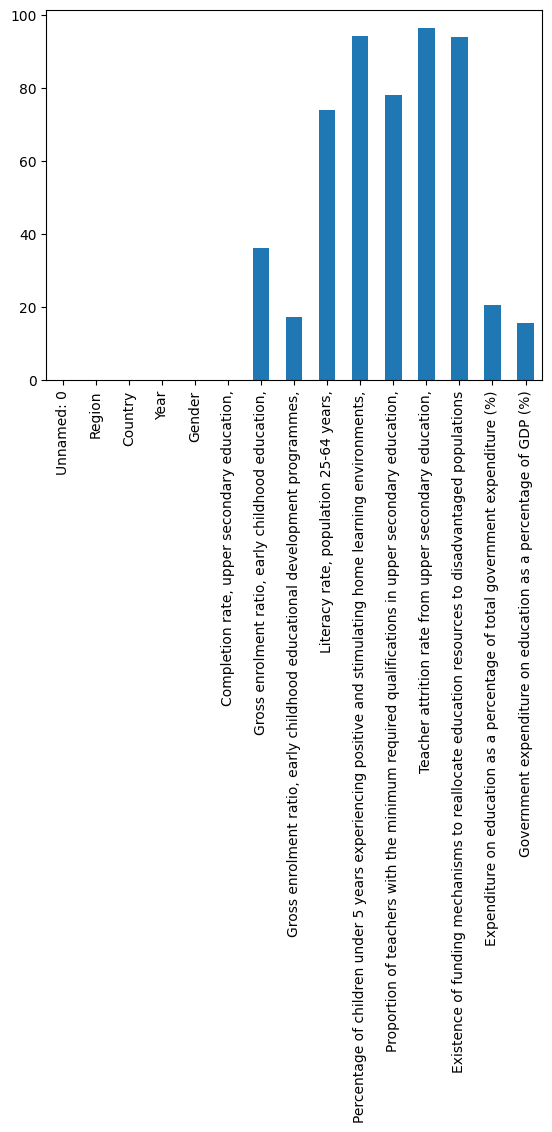

In [28]:
round((df3.isnull().sum()/len(df3) *100), 2).plot(kind='bar')

In [29]:
df3.columns

Index(['Unnamed: 0', 'Region', 'Country', 'Year', 'Gender',
       'Completion rate, upper secondary education,',
       'Gross enrolment ratio, early childhood education,',
       'Gross enrolment ratio, early childhood educational development programmes,',
       'Literacy rate, population 25-64 years,',
       'Percentage of children under 5 years experiencing positive and stimulating home learning environments,',
       'Proportion of teachers with the minimum required qualifications in upper secondary education,',
       'Teacher attrition rate from upper secondary education,',
       'Existence of funding mechanisms to reallocate education resources to disadvantaged populations',
       'Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)'],
      dtype='object')

Droping columns that has more than 90% missing values

In [30]:
df4= df3.drop(columns=[
       'Percentage of children under 5 years experiencing positive and stimulating home learning environments,',
       'Proportion of teachers with the minimum required qualifications in upper secondary education,',
       'Teacher attrition rate from upper secondary education,',
       'Existence of funding mechanisms to reallocate education resources to disadvantaged populations'
        ])

In [31]:
print('The shape of is :', df4.shape)
round((df4.isnull().sum()/len(df3) *100), 2)


The shape of is : (1876, 11)


Unnamed: 0                                                                       0.00
Region                                                                           0.00
Country                                                                          0.00
Year                                                                             0.00
Gender                                                                           0.00
Completion rate, upper secondary education,                                      0.00
Gross enrolment ratio, early childhood education,                               36.03
Gross enrolment ratio, early childhood educational development programmes,      17.27
Literacy rate, population 25-64 years,                                          73.99
Expenditure on education as a percentage of total government expenditure (%)    20.58
Government expenditure on education as a percentage of GDP (%)                  15.67
dtype: float64

<Axes: >

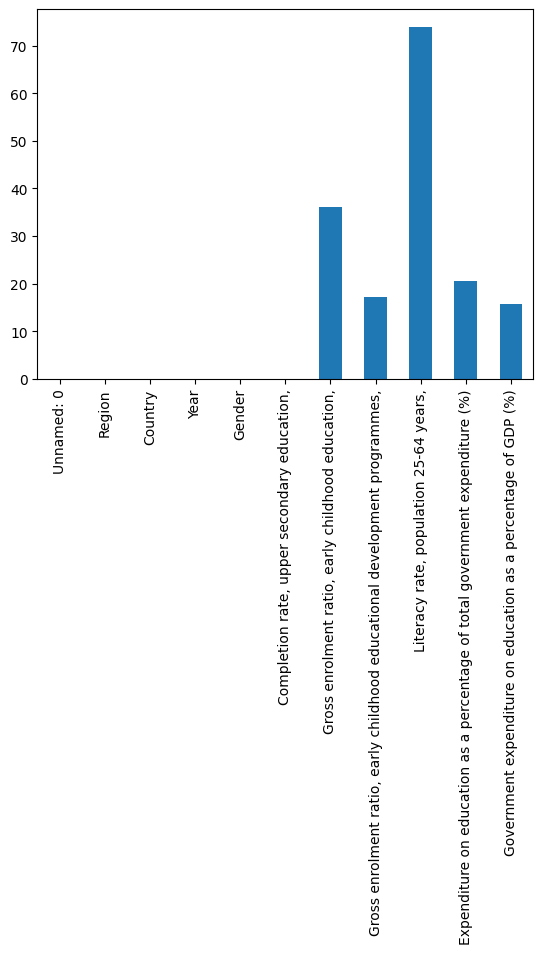

In [32]:
round((df4.isnull().sum()/len(df3) *100), 2).plot(kind="bar")

**Analysing "Literacy rate, population 25-64 years futher**

In [33]:
mask_literacy= df4["Literacy rate, population 25-64 years,"].notna()
df5= df4[mask_literacy]
df5.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, upper secondary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Literacy rate, population 25-64 years,",Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
16,16,SDG: Central Asia,Kazakhstan,2020,female,98.30,55.76,28.22,99.8,20.16,4.45
17,17,SDG: Central Asia,Kazakhstan,2020,male,97.90,56.28,27.99,99.9,20.16,4.45
76,96,SDG: Central Asia,Uzbekistan,2021,female,94.18,43.36,0.00,100.0,21.43,4.62
77,97,SDG: Central Asia,Uzbekistan,2021,male,95.90,44.63,0.00,100.0,21.43,4.62
94,114,SDG: Central and Southern Asia,Kazakhstan,2020,female,98.30,55.76,28.22,99.8,20.16,4.45


In [34]:
#df5.corr()

In [35]:
df4.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, upper secondary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Literacy rate, population 25-64 years,",Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,0,SDG: Central Asia,Kazakhstan,2012,female,96.9,NaN,NaN,NaN,19.25,3.90
1,1,SDG: Central Asia,Kazakhstan,2012,male,96.2,NaN,NaN,NaN,19.25,3.90
2,2,SDG: Central Asia,Kazakhstan,2013,female,97.0,NaN,NaN,NaN,17.96,3.44
3,3,SDG: Central Asia,Kazakhstan,2013,male,96.4,NaN,NaN,NaN,17.96,3.44
4,4,SDG: Central Asia,Kazakhstan,2014,female,97.2,36.65,0.0,NaN,17.32,3.42


In [36]:
#df4[["Completion rate, upper secondary education", " Literacy rate, population 25-64 years"]]

In [37]:
df4["Literacy rate, population 25-64 years,"].describe()

count    488.000000
mean      81.003730
std       21.667577
min        8.640000
25%       68.735000
50%       91.135000
75%       96.212500
max      100.000000
Name: Literacy rate, population 25-64 years,, dtype: float64

afr looking at the decsrition of the columns, i think it will be better we filled the missing values with the 25 percentile

In [38]:
df4["Gross enrolment ratio, early childhood education,"].describe()
#Analyzing the Gross enrolment ratio, early childhood education, column

count    1200.000000
mean       47.348558
std        28.918856
min         0.720000
25%        23.035000
50%        43.860000
75%        68.842500
max       160.860000
Name: Gross enrolment ratio, early childhood education,, dtype: float64

In [39]:
df4["Gross enrolment ratio, early childhood educational development programmes,"].describe()
#Analyzing the "Gross enrolment ratio, early childhood educational development programmes, column

count    1552.000000
mean        5.871662
std        14.995167
min         0.000000
25%         0.000000
50%         0.000000
75%         1.335000
max        93.540000
Name: Gross enrolment ratio, early childhood educational development programmes,, dtype: float64

In [40]:
df4["Literacy rate, population 25-64 years,"] = df4["Literacy rate, population 25-64 years,"].fillna(df4["Literacy rate, population 25-64 years,"].quantile(0.25))
df4["Gross enrolment ratio, early childhood education,"] =df4["Gross enrolment ratio, early childhood education,"].fillna(df4["Gross enrolment ratio, early childhood education,"].mean)
df4["Expenditure on education as a percentage of total government expenditure (%)"] = df4["Expenditure on education as a percentage of total government expenditure (%)"].fillna(df4["Expenditure on education as a percentage of total government expenditure (%)"].mean())
df4["Government expenditure on education as a percentage of GDP (%)"] = df4["Government expenditure on education as a percentage of GDP (%)"].fillna(df4["Government expenditure on education as a percentage of GDP (%)"].mean())
df4["Gross enrolment ratio, early childhood education,"] =df4["Gross enrolment ratio, early childhood education,"].fillna(df4["Gross enrolment ratio, early childhood education,"].mean)
df4["Gross enrolment ratio, early childhood educational development programmes,"] = df4["Gross enrolment ratio, early childhood educational development programmes,"].fillna(df4["Gross enrolment ratio, early childhood educational development programmes,"].mean())


In [41]:
print("The shape of the dataset is :", df4.shape)
round((df4.isnull().sum()/len(df3) *100), 2)

The shape of the dataset is : (1876, 11)


Unnamed: 0                                                                      0.0
Region                                                                          0.0
Country                                                                         0.0
Year                                                                            0.0
Gender                                                                          0.0
Completion rate, upper secondary education,                                     0.0
Gross enrolment ratio, early childhood education,                               0.0
Gross enrolment ratio, early childhood educational development programmes,      0.0
Literacy rate, population 25-64 years,                                          0.0
Expenditure on education as a percentage of total government expenditure (%)    0.0
Government expenditure on education as a percentage of GDP (%)                  0.0
dtype: float64

**Renaming the columns**

In [42]:
new_column_names = {'Completion rate, upper secondary education,': 'Completion Rate for Primary Edu',
                    'Gross enrolment ratio, early childhood education,': 'Childhood Education GER',
                    'Gross enrolment ratio, early childhood educational development programmes,': 'Gross enrolment ratio, early childhood educational development programmes',
                    'Gross intake ratio to the last grade of primary education': 'Last Grade Primary Edu GIR',
                    'Literacy rate, population 25-64 years,': 'Literacy rate for 25-64 years old'
                    }

df4.rename(columns=new_column_names, inplace=True)


In [43]:
df4.columns

Index(['Unnamed: 0', 'Region', 'Country', 'Year', 'Gender',
       'Completion Rate for Primary Edu', 'Childhood Education GER',
       'Gross enrolment ratio, early childhood educational development programmes',
       'Literacy rate for 25-64 years old',
       'Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)'],
      dtype='object')

In [44]:
df4.head()

,Unnamed: 0,Region,Country,Year,Gender,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,0,SDG: Central Asia,Kazakhstan,2012,female,96.9,<bound method NDFrame._add_numeric_operations....,5.871662,68.735,19.25,3.90
1,1,SDG: Central Asia,Kazakhstan,2012,male,96.2,<bound method NDFrame._add_numeric_operations....,5.871662,68.735,19.25,3.90
2,2,SDG: Central Asia,Kazakhstan,2013,female,97.0,<bound method NDFrame._add_numeric_operations....,5.871662,68.735,17.96,3.44
3,3,SDG: Central Asia,Kazakhstan,2013,male,96.4,<bound method NDFrame._add_numeric_operations....,5.871662,68.735,17.96,3.44
4,4,SDG: Central Asia,Kazakhstan,2014,female,97.2,36.65,0.000000,68.735,17.32,3.42


In [45]:
df4.shape

(1876, 11)

In [46]:
df4.to_csv('Preprocessed Upper Secondary Edu.csv', index=False)
#Saving the data